# Task 1: Data Preparation

Oskar Floeck, s3725028

### 1.1 Preliminaries
Import necessary modules.

In [1]:
# Module imports
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Disable warnings and allow large columns
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### 1.2 Import data
Load data into notebook for subsequent investigation.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/floeck/nba-analysis/master/NBA_players_stats.csv', sep = ',')

Take a look to see it has imported correctly.

In [3]:
df.sample(n=5, random_state=9)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
249,244,Cory Joseph,PG,29,SAC,36,2,749,90,201,0.448,24,75,0.320,66,126,0.524,27,35,0.771,20,58,78,85,24,7,36,83,231
411,396,Mitchell Robinson,C,22,NYK,27,27,778,103,156,0.660,0,0,NaN,103,156,0.660,22,46,0.478,97,129,226,14,32,41,22,78,228
452,433,Garrett Temple,SG,34,CHI,33,12,936,107,250,0.428,45,131,0.344,62,119,0.521,31,38,0.816,20,87,107,68,31,18,33,77,290
200,197,Willy Hernangómez,C,26,NOP,20,2,359,60,110,0.545,1,5,0.200,59,105,0.562,24,36,0.667,53,86,139,26,7,10,11,27,145
340,331,Larry Nance Jr.,PF,28,CLE,19,18,635,70,145,0.483,24,63,0.381,46,82,0.561,12,21,0.571,27,102,129,61,37,10,28,41,176


Looks imported correctly, so now we're going to go ahead and examine the data frame.

### 1.3 Data examination

Now to examine the shape of the dataframe and detect the presence of any null values. We will also look at summary statistics of the features.

In [4]:
print(f"Shape of the dataset is {df.shape} \n")
print(df.dtypes)

Shape of the dataset is (512, 29) 

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object


In [5]:
df.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        3
3P         0
3PA        0
3P%       33
2P         0
2PA        0
2P%        7
FT         0
FTA        0
FT%       32
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [6]:
df.describe(include='object')

,Player,Pos,Tm
count,512,512,512
unique,492,20,55
top,Jarrett Allen,SG,BRK
freq,3,117,19


In [7]:
df.describe(include='float64')

,FG%,3P%,2P%,FT%
count,509.000000,479.000000,505.000000,480.000000
mean,0.439961,0.316823,0.501632,0.742929
std,0.120485,0.140463,0.143022,0.171721
min,0.000000,0.000000,0.000000,0.000000
25%,0.391000,0.285500,0.444000,0.667000
50%,0.442000,0.349000,0.510000,0.772000
75%,0.500000,0.394000,0.575000,0.851000
max,1.000000,1.000000,1.000000,1.000000


In [8]:
df.describe(include='int64')

,Rk,Age,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,248.046875,26.025391,22.515625,10.603516,512.730469,87.326172,187.789062,27.218750,73.910156,60.107422,113.878906,36.658203,47.070312,20.808594,73.439453,94.248047,52.925781,16.050781,10.509766,28.810547,41.898438,333.275391
std,141.539473,12.099932,10.762502,12.697945,374.173372,82.210894,170.428063,29.654749,75.700355,63.802427,116.742818,45.406517,56.053013,24.399771,66.360902,86.459582,60.983960,13.501952,13.058198,28.076169,31.061290,1550.220911
min,1.000000,-19.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126.750000,22.000000,14.000000,0.000000,147.750000,18.000000,43.000000,3.000000,9.000000,10.000000,22.000000,6.000000,8.000000,4.000000,18.750000,23.000000,9.000000,4.000000,2.000000,7.000000,14.000000,50.000000
50%,250.500000,25.000000,25.000000,3.000000,497.000000,64.500000,145.000000,17.000000,50.500000,39.000000,75.000000,21.000000,29.000000,13.000000,57.500000,73.000000,35.000000,14.000000,6.000000,22.000000,39.500000,180.000000
75%,370.250000,28.000000,33.000000,20.000000,814.250000,131.250000,275.000000,45.000000,119.250000,88.250000,171.000000,48.000000,63.250000,27.000000,110.000000,140.000000,69.000000,25.000000,14.000000,40.250000,64.000000,356.750000
max,492.000000,280.000000,38.000000,37.000000,1358.000000,379.000000,764.000000,169.000000,411.000000,329.000000,543.000000,298.000000,363.000000,159.000000,357.000000,472.000000,345.000000,63.000000,111.000000,149.000000,228.000000,28800.000000


#### Summary of the information gathered above.

The shape (512, 92) matches the assignment spec.

`objects`
Although the feature players looks suitable, `Pos` and `Tm` do not. As per the spec, there should only be 7 unique positions, whereas 20 are detected. Additionally, there should only be 31 teams, whereas 55 are detected.

`float64`
There are null values detected in the columns of `FG%`, `3P%`, `2P%` and `FT%`. 

`int64`
There are a few curious values. Min `age` is -19, and max is 280, both of which are illogical. Additionally, looking at *max* of each, something else comes up. Max of `PF` is 228, which is unlikely given that would mean someone had fouled a maximum 6 times over every 38 games (6*38 = 228). Also, max of `PTS` is 28800, which is over the max of 2000 as per the spec.



### 1.4 Data Cleaning

Now to attempt to fix errors problem data detected in the previous section.

#### Cleaning features of `object`

In [9]:
print(f"Teams - {df.Tm.unique()} \n")
print(f"Positions - {df.Pos.unique()}")

Teams - ['MIA' 'MIL' 'NOP' 'SAS ' ' PHO' 'MEM' ' TOT' 'BRK ' 'CLE' 'ORL' 'LAL'
 'POR' 'TOR' 'CHI' 'WAS' 'PHO' 'UTA' 'SAC' 'CHO' 'NYK' 'DEN' 'SAS' 'LAC'
 'GSW' 'OKC' 'MIN' 'DET' 'DAL' 'IND' 'ATL' 'PHI' 'BRK' 'BOS' 'HOU' 'OKC '
 ' NOP' ' PHI' 'DET ' 'TOT' ' BRK' ' IND' 'MIL ' ' SAS' 'ORL ' ' ORL'
 'CLE ' 'H0U' 'NyK' ' MEM' 'MIA ' ' WAS' 'IND ' ' BOS' 'GSW ' 'MEM '] 

Positions - ['PF' 'PG' 'C' 'SG' 'SG ' 'SF' 'SGa' 'SF.' 'PFa' 'PF ' 'C ' ' PG' 'PG-SG '
 'sg' 'Sf' ' SG' 'SF-PF' 'pg' ' SF' 'Pg']


As shown above, we need to fix a few things, namely clearing whitespace and correcting typos.

In [10]:
# Positions: Uppercase, clear whitespace & dots, and two typo's to appripriate values
df['Pos'] = df['Pos'].str.upper()
df['Pos'] = df['Pos'].str.replace(' ', '').str.replace('.', '').str.replace('A', '')

# Teams: Uppercase, clear whitespace and change '0' -> 'O'
df['Tm'] = df['Tm'].str.upper()
df['Tm'] = df['Tm'].str.replace(' ', '').str.replace('0', 'O')

In [11]:
print(f"Teams - {df.Tm.unique()} \n")
print(f"Positions - {df.Pos.unique()}")
df.describe(include='object')

Teams - ['MIA' 'MIL' 'NOP' 'SAS' 'PHO' 'MEM' 'TOT' 'BRK' 'CLE' 'ORL' 'LAL' 'POR'
 'TOR' 'CHI' 'WAS' 'UTA' 'SAC' 'CHO' 'NYK' 'DEN' 'LAC' 'GSW' 'OKC' 'MIN'
 'DET' 'DAL' 'IND' 'ATL' 'PHI' 'BOS' 'HOU'] 

Positions - ['PF' 'PG' 'C' 'SG' 'SF' 'PG-SG' 'SF-PF']


,Player,Pos,Tm
count,512,512,512
unique,492,7,31
top,Jarrett Allen,SG,BRK
freq,3,123,23


As shown above, these issues are now fixed. Positions unique is 7, and teams 31.

#### Cleaning features of `float64`

In [12]:
print(df[['FG%', '3P%', '2P%', 'FT%']].isnull().sum())
df[['FG%', '3P%', '2P%', 'FT%']] = df[['FG%', '3P%', '2P%', 'FT%']].round(3)

FG%     3
3P%    33
2P%     7
FT%    32
dtype: int64


As determined previously, null values were detected in a all of the float64 features. The line below will clear rows where a null is found.

In [13]:
df = df.dropna(how='any',axis=0) 

In [14]:
df[['FG%', '3P%', '2P%', 'FT%']].isnull().sum()

FG%    0
3P%    0
2P%    0
FT%    0
dtype: int64

As shown, nulls are now cleared

#### Cleaning features of `int64`

First we will investigate if a player has played too many games.

In [15]:
temp = df[['Rk', 'Player', 'G']]
temp = df.groupby(['Rk', 'Player'], as_index=False).sum()
temp['G'].nlargest(5)

153    62
5      58
333    58
227    52
349    50
Name: G, dtype: int64

Seems good. Now we will fix up the anomalous results of the other features.

In [16]:
# Correct negative age and massive age. From google...
# Killian Hayes is 19, not -19
# And Anthony Gill is 28, not 280

df.loc[df['Age'] == -19, 'Age'] = 19
df.loc[df['Age'] == 280, 'Age'] = 28

In [17]:
df['Age'].describe()

count    451.000000
mean      25.818182
std        4.081147
min       19.000000
25%       23.000000
50%       25.000000
75%       28.500000
max       37.000000
Name: Age, dtype: float64

Correct max personal fouls

In [18]:
# Correct PF max
df['PF'].nlargest(5)

511    228
209    127
381    120
421    120
99     118
Name: PF, dtype: int64

In [19]:
df = df.drop(df[df.PF == 228].index)

Correct max points

In [20]:
# Correct Max PTS
df['PTS'].nlargest(5)

4      28800
38      1053
110     1039
13      1015
277     1013
Name: PTS, dtype: int64

In [21]:
df = df.drop(df[df.PTS == 28800].index)

Confirm total points are calculated correctly

In [22]:
# Now to confirm the total points are calculated correctly.
df['total_points'] = (2 * df['2P']) + (3 * df['3P'] + df['FT'])
df['total_points'].equals(df['PTS'])

True

#### Saving cleaned data set to new file

In [23]:
df = df.drop(columns=['total_points'])
df.to_csv('cleaned_NBA_players_stats.csv', index=False)

# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

In [24]:
df2 = df.nlargest(5, 'PTS')
df2.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
38,37,Bradley Beal,SG,27,WAS,32,32,1143,368,764,0.482,74,221,0.335,294,543,0.541,243,269,0.903,43,131,174,151,44,14,105,82,1053
110,109,Stephen Curry,PG,32,GSW,35,35,1194,343,718,0.478,169,411,0.411,174,307,0.567,184,197,0.934,17,174,191,221,46,2,111,64,1039
13,12,Giannis Antetokounmpo,PF,26,MIL,35,35,1189,368,661,0.557,39,137,0.285,329,524,0.628,240,363,0.661,64,344,408,205,44,49,128,106,1015
277,268,Damian Lillard,PG,30,POR,34,34,1224,315,708,0.445,146,380,0.384,169,328,0.515,237,254,0.933,15,130,145,271,35,9,111,53,1013
240,237,Nikola Jokić,C,25,DEN,36,36,1293,379,668,0.567,56,134,0.418,323,534,0.605,163,185,0.881,101,296,397,309,58,23,114,107,977


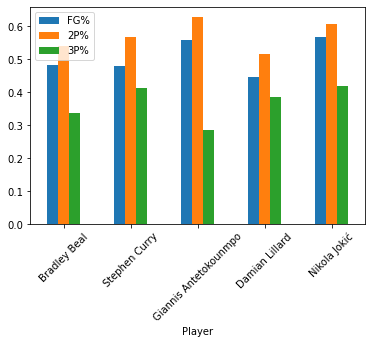

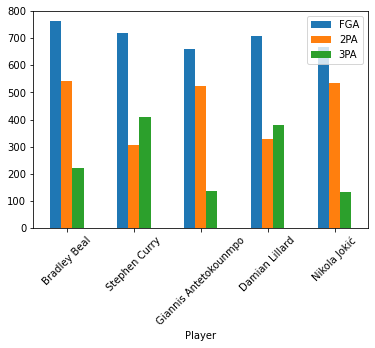

In [25]:
df2_plot_a = df2[['Player', 'FG%', '2P%', '3P%']]
df2_plot_b = df2[['Player', 'FGA', '2PA', '3PA']]

ax1 = df2_plot_a.plot.bar(x='Player', secondary_y='PF', rot=45)
ax2 = df2_plot_b.plot.bar(x='Player', secondary_y='PF', rot=45)

## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.


In [26]:
# Create a temporary dataframe of 3P/3PA and see difference between itself and other existing values
df3 = df[['3P', '3PA', '3P%']]
df3['3P%_test'] = (df3['3P'] / df3['3PA']).round(3)
df3.head()

,3P,3PA,3P%,3P%_test
2,0,1,0.000,0.000
3,2,6,0.050,0.333
6,30,98,0.306,0.306
7,46,113,0.407,0.407
8,4,8,0.050,0.500


In [27]:
df3.loc[df3['3P%'] != df3['3P%_test']]
# As shown below, these are the values that do not match calculated

,3P,3PA,3P%,3P%_test
3,2,6,0.050,0.333
8,4,8,0.050,0.500
25,34,92,0.730,0.370
362,35,112,0.313,0.312


As shown above, these are the values that need correcting.

In [28]:
df.loc[df['3P%'].index == 3, '3P%'] = 0.333
df.loc[df['3P%'].index == 8, '3P%'] = 0.500
df.loc[df['3P%'].index == 25, '3P%'] = 0.370
df.loc[df['3P%'].index == 362, '3P%'] = 0.312

In [29]:
df['3P%'].equals(df3['3P%_test'])

True

## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.


Before running this correlation function, a few predictions are going to be made.

* `Age`: As players age, and continue to do so, their scoring potential will increase. Therefore should see some sort of correlation.
* `PF (Personal Fouls)`: The more points, the more engagements and therefore more potential for fouls.
* `G (Games)`: The more games played, the more points that could be scored.
* `MP (Minutes played)`: Similar to games, the more time on court, the more potential to score.
* `FT, 2P & 3P (Scores)`: The more scoring shots, the more points. Although it will be interesting to see which of these is more strongly correlated with a generally higher score. 

<AxesSubplot:>

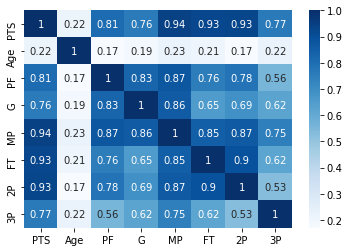

In [30]:
df4 = df[['PTS', 'Age', 'PF', 'G', 'MP', 'FT', '2P', '3P']]

df4 = df4.corr(method='spearman')

sns.heatmap(df4, cmap="Blues", annot=True)

As shown above, we can see a the relationship between total points and numerous other features such as age. Some takeaways from this is that there is strong correlation between minutes played and points scored, which makes sense, as to score you need game time to attempt shots. Additionally, interesting that most correlation was found between free throws and 2-pointers over 3-pointers, which also makes sense as 3-pointers are generally more difficult to hit.